# Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and humidity. However, it is more noticeable more cities with humditity at latitude 60-65
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 40, and 90% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres at 70 latitude, a few cities has strongest winds with at least 25 mph


In [1]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform
from api_keys import api_key

In [2]:
#create a df to lat, lon
latlng_df = pd.DataFrame()

# Create a set of random lat and lng combinations
latlng_df['lat'] = np.random.uniform(low=-90.000, high=90.000, size=1500)
latlng_df['lng'] = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [3]:
latlng_df.head()

,lat,lng
0,-66.666368,-173.769243
1,9.025768,-18.890645
2,-26.995824,128.510881
3,-89.134859,-99.363007
4,10.542133,-71.587302


# Generate Cities List

In [4]:
# # Identify nearest city for each lat, lng combination and country 
# just in case there may be multiple same city name but at different locations.
cities = []
countries = []

for index, row in latlng_df.iterrows():    
    city = citipy.nearest_city(row['lat'],row['lng'])
    cities.append(city.city_name)
    countries.append(city.country_code)
 
 
    
latlng_df['City'] = cities
latlng_df['Country'] = countries


In [5]:
len(latlng_df)
latlng_df = latlng_df.drop_duplicates(['City','Country'])
len(latlng_df)

624

In [6]:
latlng_df.head()
cities_list = latlng_df.drop_duplicates(["City","Country"]).reset_index()


In [7]:
cities_list.count()


index      624
lat        624
lng        624
City       624
Country    624
dtype: int64

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).

In [8]:
city_data = []

temp = []
max_temp = []
humidity = []
clouds = []
winds = []
countries = []
city_name = []
city_lat = []
city_lng = []

counter = 0
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

for index, row in cities_list.iterrows():
    counter += 1
    city = row["City"]  
    
  
    
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
        
    if response.get("id"):
        temp.append(response['main']['temp']) 
        max_temp.append(response['main']['temp_max'])
        city_name.append(response["name"])
        city_lat.append(response['coord']["lat"])
        city_lng.append(response['coord']["lon"])
        countries.append(response["sys"]["country"])
        clouds.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        winds.append(response["wind"]["speed"])
       
        print(f"Processing Record {counter}  | {city}")
       
    else:
        print(f"City not found. Skipping... | {city}")
        


Processing Record 1  | vaini
Processing Record 2  | bubaque
Processing Record 3  | yulara
Processing Record 4  | punta arenas
Processing Record 5  | santa rita
Processing Record 6  | atuona
Processing Record 7  | bowen
City not found. Skipping... | camana
Processing Record 9  | gasa
Processing Record 10  | nyurba
Processing Record 11  | talnakh
City not found. Skipping... | bengkulu
City not found. Skipping... | attawapiskat
Processing Record 14  | hobart
Processing Record 15  | pacific grove
Processing Record 16  | hun
Processing Record 17  | albany
Processing Record 18  | anchorage
Processing Record 19  | arraial do cabo
Processing Record 20  | ribeira grande
Processing Record 21  | busselton
City not found. Skipping... | brasileia
Processing Record 23  | san jeronimo
Processing Record 24  | ushuaia
Processing Record 25  | castro
Processing Record 26  | bestobe
Processing Record 27  | hambantota
Processing Record 28  | kapaa
Processing Record 29  | diego de almagro
Processing Record 

Processing Record 239  | kuusamo
Processing Record 240  | vallenar
Processing Record 241  | san patricio
Processing Record 242  | mar del plata
Processing Record 243  | cabra
Processing Record 244  | paita
Processing Record 245  | lagoa
Processing Record 246  | kuznechnoye
Processing Record 247  | poya
Processing Record 248  | adrar
Processing Record 249  | matagami
Processing Record 250  | avarua
Processing Record 251  | sangamner
Processing Record 252  | karratha
Processing Record 253  | cap malheureux
Processing Record 254  | itarema
Processing Record 255  | plettenberg bay
Processing Record 256  | garowe
Processing Record 257  | ajaccio
Processing Record 258  | wynyard
Processing Record 259  | laguna
Processing Record 260  | san rafael del sur
Processing Record 261  | cleveland
Processing Record 262  | kaitangata
Processing Record 263  | pimentel
Processing Record 264  | umm kaddadah
Processing Record 265  | rybnaya sloboda
Processing Record 266  | aklavik
Processing Record 267  | 

Processing Record 478  | yeniseysk
Processing Record 479  | kenai
Processing Record 480  | codo
Processing Record 481  | comodoro rivadavia
Processing Record 482  | gladstone
Processing Record 483  | ambulu
Processing Record 484  | innisfail
Processing Record 485  | killybegs
Processing Record 486  | santa cruz cabralia
Processing Record 487  | storforshei
Processing Record 488  | xining
Processing Record 489  | san juan
Processing Record 490  | jiexiu
Processing Record 491  | champerico
Processing Record 492  | richards bay
Processing Record 493  | rudsar
Processing Record 494  | palu
Processing Record 495  | albesti
Processing Record 496  | salekhard
Processing Record 497  | darnah
Processing Record 498  | yeppoon
City not found. Skipping... | korla
Processing Record 500  | nouakchott
Processing Record 501  | the pas
Processing Record 502  | ambon
Processing Record 503  | chernyshevskiy
City not found. Skipping... | rostaq
Processing Record 505  | ozuluama
Processing Record 506  | du

In [9]:
weather_data = pd.DataFrame({ "City" : city_name,
                              "Country": countries,
                              "lat": city_lat,
                              "lng": city_lng,
                              "Temp": temp,
                              "Max Temp": max_temp,
                              "humidity": humidity,                             
                              "Cloudiness": clouds,
                              "Wind Speed": winds })





In [10]:
#column order
weather_data = weather_data[["City","Country","lat","lng","Temp","Max Temp","humidity","Cloudiness","Wind Speed"]]
weather_data.head()


,City,Country,lat,lng,Temp,Max Temp,humidity,Cloudiness,Wind Speed
0,Vaini,IN,15.34,74.49,74.93,74.93,77,3,2.13
1,Bubaque,GW,11.28,-15.83,76.91,76.91,71,74,18.07
2,Yulara,AU,-25.24,130.99,51.80,51.80,53,0,5.82
3,Punta Arenas,CL,-53.16,-70.91,51.37,51.80,66,0,26.40
4,Santa Rita,VE,10.21,-67.56,80.33,80.33,68,97,5.37


In [11]:
weather_data.to_csv("weather.csv",encoding="utf-8",index=False)

# Latitude vs. Temperature Plot

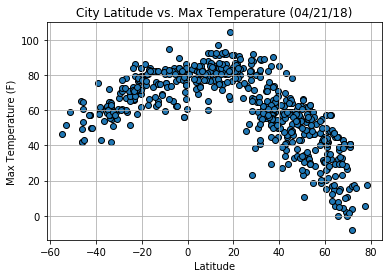

In [12]:
plt.scatter(weather_data["lat"],weather_data["Max Temp"],marker="o",edgecolor="black")

plt.title("City Latitude vs. Max Temperature (04/21/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Max_Temp_vs_Latitude_plots.png")
plt.show()

# Latitude vs. Humidity Plot

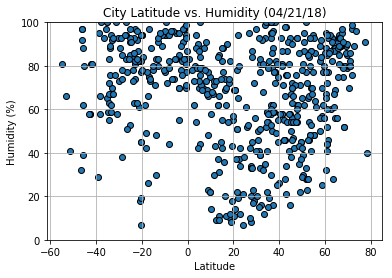

In [13]:
plt.scatter(weather_data["lat"],weather_data["humidity"],marker="o",edgecolor="black")

plt.title("City Latitude vs. Humidity (04/21/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0,100)

plt.savefig("Humidity_vs_Latitude_plots.png")
plt.show()

# Latitude vs. Cloudiness Plot

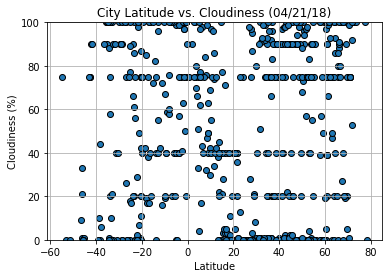

In [14]:
plt.scatter(weather_data["lat"],weather_data["Cloudiness"],marker="o",edgecolor="black")

plt.title("City Latitude vs. Cloudiness (04/21/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0,100)

plt.savefig("Cloudiness_vs_Latitude_plots.png")
plt.show()

# Latitude vs. Wind Speed Plot

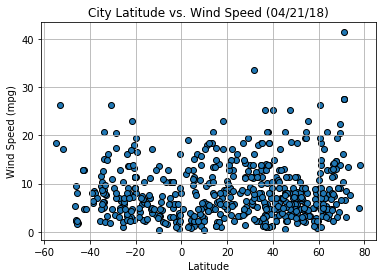

In [15]:
plt.scatter(weather_data["lat"],weather_data["Wind Speed"],marker="o",edgecolor="black")

plt.title("City Latitude vs. Wind Speed (04/21/18)")
plt.ylabel("Wind Speed (mpg)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.ylim(0,30)

plt.savefig("WindSpeed_vs_Latitude_plots.png")
plt.show()